In [21]:
# Packages required (can be installed by pip3 install <package>)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pysal
from pysal.weights.util import get_points_array_from_shapefile

# London Census data analysis

## Ethnic groups

### Histograms

**Count in function of frequency sum**

In [22]:
# Build Census Ethnic dataframe reading csv file
datae = "~/Dropbox/Resolution - SP London/Data/Census/London/Census data for Segregation" \
        "/KS201ew_2011_oa_Ethnic/KS201EWDATA.csv"
dfce = pd.read_csv(datae)
dfce.head()

,Geocode,All_categ,W_British,W_Irish,W_Gypsy,W_Other,MX_Wbc,MX_Wba,MX_Was,MX_other,...,As.Indian,As.Pakist,As.Bangl,As.Chin,As.other,B.African,B.Carib,B.other,Oth.Arab,Other.eth
0,K04000001,56075912,45134686,531087,57680,2485942,426715,165974,341727,289984,...,2.519724,2.005337,0.797492,0.701087,1.490337,1.764801,1.060750,0.500102,0.411228,0.594009
1,E92000001,53012456,42279236,517001,54895,2430010,415616,161550,332708,283005,...,2.632781,2.098152,0.823418,0.715875,1.545678,1.844361,1.114863,0.524135,0.416855,0.617653
2,W92000004,3063456,2855450,14086,2785,55932,11099,4424,9019,6979,...,0.563285,0.399190,0.348854,0.445183,0.532666,0.388026,0.124337,0.084219,0.313861,0.184857
3,E12000001,2596886,2431423,8035,1684,34425,5938,3549,8022,4940,...,0.609076,0.763645,0.422506,0.550043,0.527362,0.422891,0.045940,0.040241,0.225270,0.200278
4,E12000002,7052177,6141069,64930,4147,151570,39204,18392,30529,22766,...,1.522268,2.686206,0.650820,0.681336,0.662916,0.840563,0.327998,0.219223,0.347807,0.279176


In [23]:
# slice ethnic columns and sum each column
ethnic = dfce.loc[:,'W_Irish':'Other_eth']
print("Groups -------- Sum")
ethnic.sum()

Groups -------- Sum


W_Irish       3703523
W_Gypsy        400975
W_Other      17345662
MX_Wbc        2975906
MX_Wba        1157394
MX_Was        2383070
MX_other      2022909
As_Indian     9873450
As_Pakist     7859348
As_Bangl      3119720
As_Chin       2738349
As_other      5833722
B_African     6915509
B_Carib       4159966
B_other       1960479
Oth_Arab      1604585
Other_eth     2326009
dtype: int64

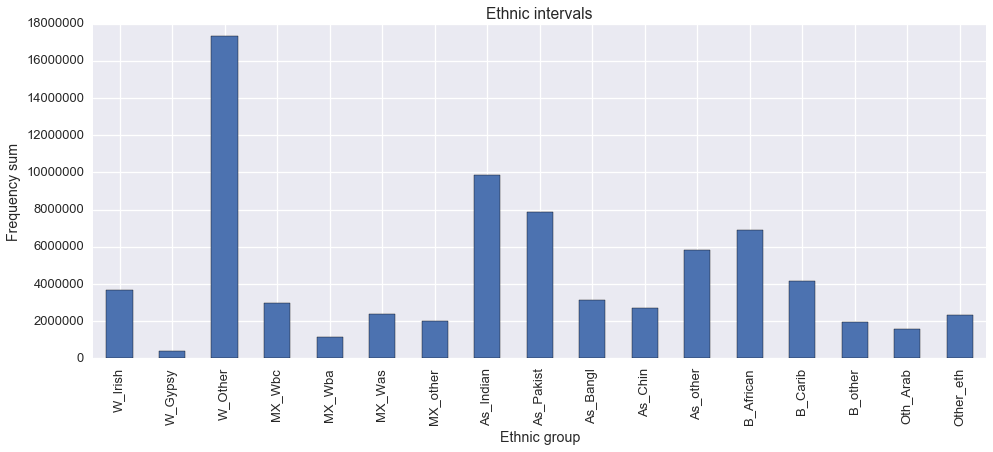

In [24]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(16, 6), dpi=300)
plt.xlabel('Ethnic group')
plt.ylabel('Frequency sum')
plt.title('Ethnic intervals')
plt.ticklabel_format(style='plain', axis='y')

ethnic.sum().plot(kind='bar')

* Column "All_categ" and "W_British" removed from plot, total distorcing distribution

**Ethnic groups (count) in function of frequency sum with white (W_British)**

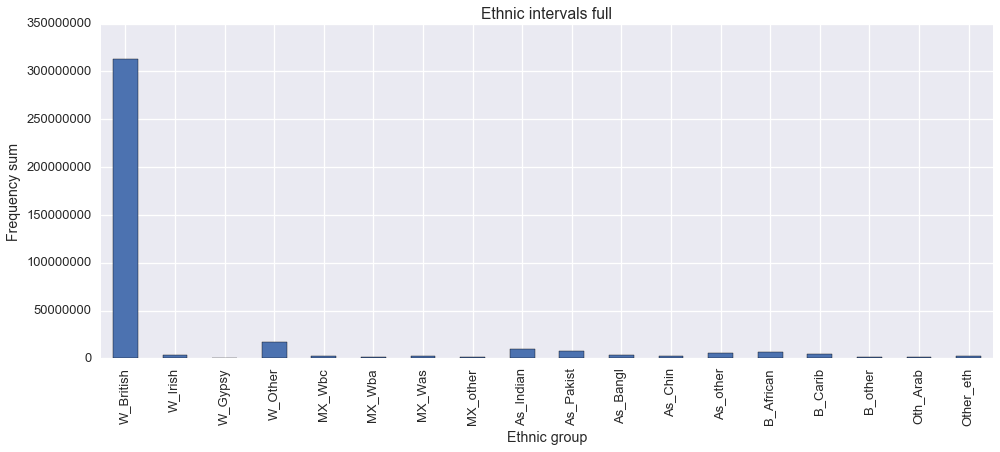

In [25]:
% matplotlib inline

# slice ethnic columns and sum each column
ethnic_full = dfce.loc[:,'W_British':'Other_eth']

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(16, 6), dpi=300)
plt.xlabel('Ethnic group')
plt.ylabel('Frequency sum')
plt.title('Ethnic intervals full')
plt.ticklabel_format(style='plain', axis='y')

ethnic_full.sum().plot(kind='bar')

### Pearson Correlation

This data frame selects data from **brute groups counts** as a test for comparision with proportion data

In [26]:
# Slice dataframe to get counts columns
cor_mat_count = ethnic_full.corr()
cor_mat_count

,W_British,W_Irish,W_Gypsy,W_Other,MX_Wbc,MX_Wba,MX_Was,MX_other,As_Indian,As_Pakist,As_Bangl,As_Chin,As_other,B_African,B_Carib,B_other,Oth_Arab,Other_eth
W_British,1.000000,0.981370,0.994558,0.968566,0.985074,0.972519,0.986009,0.970035,0.967968,0.978345,0.942529,0.983513,0.956704,0.934869,0.931051,0.926533,0.957109,0.946632
W_Irish,0.981370,1.000000,0.984941,0.996320,0.996764,0.997882,0.998663,0.997590,0.993769,0.980381,0.981804,0.998788,0.993147,0.983317,0.981024,0.979122,0.991569,0.988904
W_Gypsy,0.994558,0.984941,1.000000,0.977614,0.985176,0.978485,0.990394,0.977392,0.971880,0.971509,0.948163,0.985685,0.966715,0.945825,0.940454,0.936206,0.961514,0.955572
W_Other,0.968566,0.996320,0.977614,1.000000,0.990573,0.998671,0.995530,0.999473,0.992051,0.966724,0.984416,0.995480,0.997386,0.991545,0.987181,0.986655,0.993724,0.994947
MX_Wbc,0.985074,0.996764,0.985176,0.990573,1.000000,0.992662,0.997050,0.992899,0.993807,0.986913,0.977201,0.996280,0.987247,0.975855,0.977326,0.973349,0.986249,0.983216
MX_Wba,0.972519,0.997882,0.978485,0.998671,0.992662,1.000000,0.996420,0.999438,0.992489,0.972286,0.985078,0.997727,0.996285,0.990895,0.986225,0.985995,0.994619,0.993776
MX_Was,0.986009,0.998663,0.990394,0.995530,0.997050,0.996420,1.000000,0.996314,0.992489,0.981797,0.977693,0.998613,0.991095,0.978797,0.975852,0.973340,0.988480,0.985558
MX_other,0.970035,0.997590,0.977392,0.999473,0.992899,0.999438,0.996314,1.000000,0.993692,0.971301,0.986139,0.996801,0.997791,0.992260,0.989088,0.988341,0.995014,0.995561
As_Indian,0.967968,0.993769,0.971880,0.992051,0.993807,0.992489,0.992489,0.993692,1.000000,0.976445,0.982782,0.992092,0.994082,0.985084,0.986104,0.983275,0.990792,0.990950
As_Pakist,0.978345,0.980381,0.971509,0.966724,0.986913,0.972286,0.981797,0.971301,0.976445,1.000000,0.960356,0.980849,0.964801,0.949064,0.952545,0.947061,0.969947,0.959844


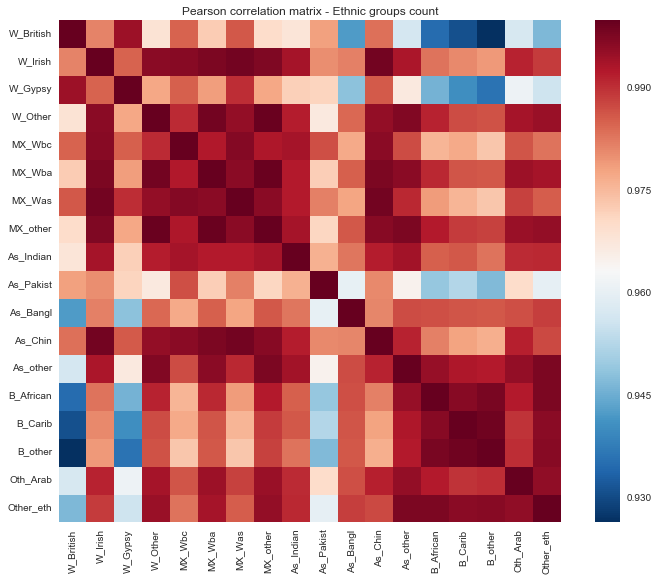

In [27]:
# Plot Heatmap based on cor_mat_count data frame - Counts
% matplotlib inline
sns.set(context="notebook")
f1, ax1 = plt.subplots(figsize=(12, 9))
plt.title('Pearson correlation matrix - Ethnic groups count')
sns.heatmap(cor_mat_count, cmap='RdBu_r', square=True)

This data frame selects columns data with **percentage** for ethnic groups

In [28]:
# Slice data frame to get proportion data columns
ethnic_prop = dfce.loc[:,'W.British':'Other.eth']
cor_mat_prop = ethnic_prop.corr()
cor_mat_prop

,W.British,W.Irish,W.Gypsy,W.Other,MX.Wbc,MX.Wba,MX.Was,MX.other,As.Indian,As.Pakist,As.Bangl,As.Chin,As.other,B.African,B.Carib,B.other,Oth.Arab,Other.eth
W.British,1.000000,-0.416598,-0.039401,-0.654911,-0.432184,-0.447249,-0.454670,-0.560538,-0.573284,-0.513658,-0.394510,-0.371156,-0.692544,-0.648329,-0.639843,-0.621067,-0.446394,-0.648194
W.Irish,-0.416598,1.000000,-0.007213,0.407910,0.229113,0.227808,0.296334,0.354184,0.143131,0.048338,0.055648,0.183249,0.271375,0.228441,0.301191,0.265037,0.216087,0.288921
W.Gypsy,-0.039401,-0.007213,1.000000,0.023304,0.013301,0.022695,0.003040,0.015881,-0.005595,0.012242,0.003328,-0.002201,0.015648,0.031801,0.011713,0.015230,-0.001206,0.011880
W.Other,-0.654911,0.407910,0.023304,1.000000,0.213992,0.341159,0.394989,0.512735,0.173710,0.071368,0.121256,0.349895,0.407425,0.371111,0.344118,0.337632,0.341997,0.504663
MX.Wbc,-0.432184,0.229113,0.013301,0.213992,1.000000,0.312991,0.219420,0.344801,0.106222,0.110378,0.094537,0.115009,0.208018,0.405045,0.550241,0.465137,0.139706,0.267375
MX.Wba,-0.447249,0.227808,0.022695,0.341159,0.312991,1.000000,0.209109,0.368770,0.087651,0.061079,0.116060,0.183422,0.252723,0.503350,0.391763,0.421796,0.222728,0.319325
MX.Was,-0.454670,0.296334,0.003040,0.394989,0.219420,0.209109,1.000000,0.328862,0.214250,0.168754,0.102157,0.232837,0.325203,0.205777,0.231851,0.215005,0.223392,0.303715
MX.other,-0.560538,0.354184,0.015881,0.512735,0.344801,0.368770,0.328862,1.000000,0.157458,0.087459,0.131260,0.251019,0.352102,0.437917,0.457592,0.450361,0.283693,0.437492
As.Indian,-0.573284,0.143131,-0.005595,0.173710,0.106222,0.087651,0.214250,0.157458,1.000000,0.250961,0.115287,0.124572,0.491429,0.150148,0.203138,0.167802,0.162126,0.320338
As.Pakist,-0.513658,0.048338,0.012242,0.071368,0.110378,0.061079,0.168754,0.087459,0.250961,1.000000,0.226540,0.037923,0.277994,0.114187,0.161775,0.136158,0.156369,0.165773


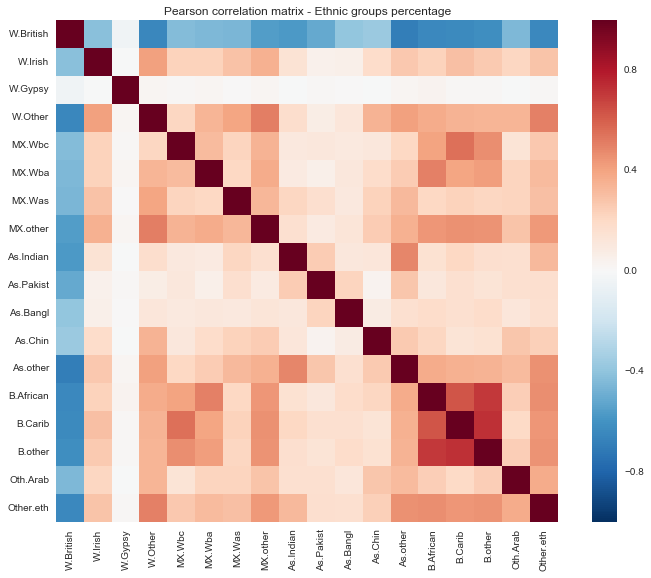

In [29]:
# Plot Heatmap based on cor_mat_prop data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f2, ax2 = plt.subplots(figsize=(12, 9))
plt.title('Pearson correlation matrix - Ethnic groups percentage')
sns.heatmap(cor_mat_prop, square=True)

Heatmap showing a positive correlation for black groups
<prep>
```
Black/African/Caribbean/Black British: African
Black/African/Caribbean/Black British: Caribbean
Black/African/Caribbean/Black British: Other Black
```
<prep>

### Moran I Correlation 

Based on percentage of groups

#### Based on Queen Contiguity Weight

Prepares data reading shape file for OA London and computes Contiguity Based Weights using Queen method

In [30]:
shp_path = "/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "London/OA Boundary/resolution_oa_2011_ks201-501ew.shp"
weight_cont = pysal.queen_from_shapefile(shp_path)
# weight_full = weight.full()

Island id:  [34622]


**Histogram showing the distribuition of neighbors in queen weight**

<Container object of 29 artists>

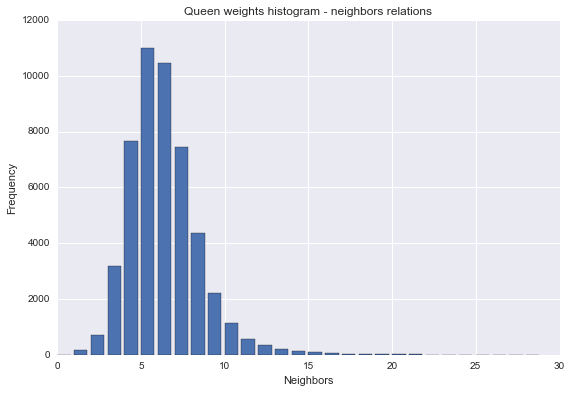

In [32]:
% matplotlib inline
sns.set(context="notebook")
plt.figure(facecolor="white", figsize=(9, 6), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Queen weights histogram - neighbors relations')
plt.bar(*zip(*weight_cont.histogram))

**Compute Bivariate Moran for all elements of ethnic groups**

Variables are compared pairwised resulting on a matrix

999 random permutations are used for calculation of pseudo p_values

In [42]:
# Read dbf associated with the same shape file
# Obs: QGIS field lenght limit(10) changed column names during join

def calc_moran(arrayi, arrayj, weight):
    moran = pysal.Moran_BV(arrayi, arrayj, weight, permutations=999)
    result = moran.I
    pvalue = moran.p_z_sim
    return result, pvalue


def block_processing(i, weight, varnames, file):
    morans = []
    pvalues = []
    
    for item in varnames:
        j = np.array(file.by_col[item])
        serie = calc_moran(i,j,weight)
        moran = serie[0]
        pvalue = serie[1]
        morans.append(moran)
        pvalues.append(pvalue)
    return morans, pvalues


def calc_moran_matrix(varnames, weight, file):
    moran_matrix = []
    pvalue_matrix = []
    
    for item in varnames:
        i = np.array(file.by_col[item])
        result = block_processing(i,weight, varnames, file)
        res_moran = result[0]
        res_pvalue = result[1]
        moran_matrix.append(res_moran)
        pvalue_matrix.append(res_pvalue)
    return moran_matrix, pvalue_matrix

In [43]:
# Call main function to compute Moran and P-values ethnic groups
f1 = pysal.open("/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
                "London/OA Boundary/resolution_oa_2011_ks201-501ew.dbf")

var_ethnics = list(cor_mat_prop)
matrices_ethnic = calc_moran_matrix(var_ethnics, weight_cont, f1)

DataFrame with pairwise results

In [45]:
dfmoran_ethnic = pd.DataFrame(matrices_ethnic[0], columns=var_ethnics, index=var_ethnics)
dfmoran_ethnic

,W.British,W.Irish,W.Gypsy,W.Other,MX.Wbc,MX.Wba,MX.Was,MX.other,As.Indian,As.Pakist,As.Bangl,As.Chin,As.other,B.African,B.Carib,B.other,Oth.Arab,Other.eth
W.British,0.924502,-0.309150,0.053195,-0.586337,-0.361912,-0.377482,-0.269071,-0.461911,-0.478251,-0.415297,-0.308498,-0.299085,-0.561773,-0.546461,-0.571351,-0.556813,-0.379480,-0.553760
W.Irish,-0.309540,0.477715,-0.051805,0.364014,0.163274,0.136601,0.221417,0.262937,0.083970,-0.000555,0.001589,0.138881,0.160379,0.092000,0.186593,0.178738,0.208611,0.209993
W.Gypsy,0.049015,-0.049809,0.083740,-0.054131,-0.021128,-0.014602,-0.043747,-0.038176,-0.028950,-0.017349,-0.016996,-0.035035,-0.030341,0.004038,-0.017588,-0.015177,-0.027478,-0.029895
W.Other,-0.583260,0.359146,-0.058209,0.800560,0.187701,0.248481,0.322026,0.419279,0.079370,0.062465,0.087596,0.341888,0.254006,0.242187,0.274824,0.276247,0.371882,0.462842
MX.Wbc,-0.361900,0.166555,-0.023510,0.189780,0.416703,0.270461,0.099473,0.285029,-0.000842,0.070437,0.057097,0.086795,0.120379,0.374241,0.483888,0.418883,0.069748,0.210139
MX.Wba,-0.376093,0.137310,-0.016796,0.248314,0.271030,0.292393,0.100656,0.270845,0.029458,0.053985,0.082120,0.136880,0.139657,0.394327,0.354135,0.355874,0.144838,0.246030
MX.Was,-0.266011,0.219109,-0.047260,0.320929,0.097067,0.098919,0.233785,0.205264,0.107276,0.044242,0.029212,0.159833,0.170483,0.048482,0.103211,0.098345,0.163100,0.194170
MX.other,-0.460588,0.263488,-0.041411,0.421104,0.283006,0.268506,0.207810,0.366677,0.068155,0.050717,0.084839,0.200462,0.198296,0.316584,0.375113,0.363332,0.212747,0.336844
As.Indian,-0.478120,0.083163,-0.030744,0.078661,-0.000713,0.029644,0.107388,0.067406,0.831850,0.386070,0.075672,0.048817,0.508425,0.067738,0.097604,0.099871,0.138056,0.203937
As.Pakist,-0.412723,-0.001859,-0.019312,0.061611,0.069526,0.053146,0.042434,0.049934,0.383798,0.793697,0.163572,-0.013589,0.313776,0.103334,0.149272,0.107579,0.074797,0.123652


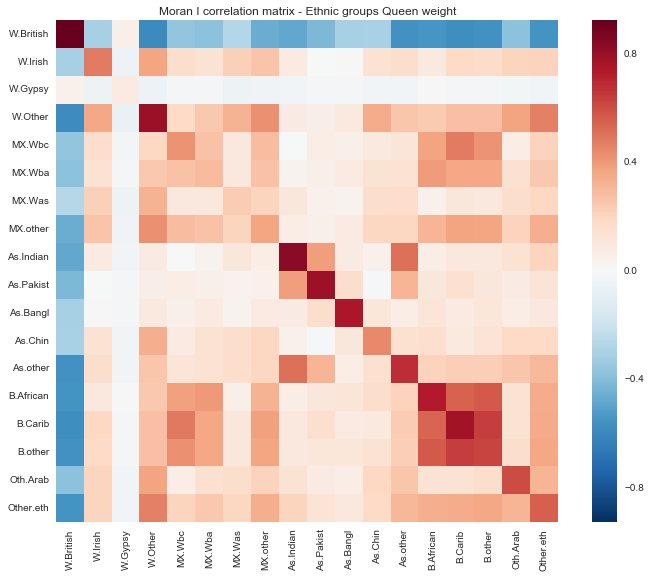

In [46]:
# Plot Heatmap based on dfmoran data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Ethnic groups Queen weight')
sns.heatmap(dfmoran_ethnic, square=True)

Heatmap showing a positive correlation for black groups
as could be seen in the Pearson correlation


**P-values obtained from previous map**

In [47]:
dfpvalue_ethnic = pd.DataFrame(matrices_ethnic[1], columns=var_ethnics, index=var_ethnics)
dfpvalue_ethnic

,W.British,W.Irish,W.Gypsy,W.Other,MX.Wbc,MX.Wba,MX.Was,MX.other,As.Indian,As.Pakist,As.Bangl,As.Chin,As.other,B.African,B.Carib,B.other,Oth.Arab,Other.eth
W.British,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
W.Irish,0.0,0.000000e+00,8.744566e-47,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.502383e-01,3.420205e-01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
W.Gypsy,0.0,3.910678e-121,0.000000e+00,1.591624e-140,6.718790e-23,8.947641e-12,4.955718e-91,6.007238e-70,8.606369e-41,3.196556e-17,5.528856e-15,6.252505e-60,1.007405e-42,0.026824,8.588448e-16,4.944441e-12,4.205537e-39,1.183006e-42
W.Other,0.0,0.000000e+00,3.378706e-39,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MX.Wbc,0.0,0.000000e+00,2.028363e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.802690e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MX.Wba,0.0,0.000000e+00,3.598409e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MX.Was,0.0,0.000000e+00,2.438606e-60,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MX.other,0.0,0.000000e+00,2.206185e-36,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
As.Indian,0.0,0.000000e+00,9.571241e-13,0.000000e+00,4.403503e-01,6.156076e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
As.Pakist,0.0,3.262140e-01,1.765227e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.050824e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


#### Based on Kernel Weight

Weight computed using a 700m Kernel function with a gaussian form

In [49]:
# weight based on distance
shp_path2 = "/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "London/OA Boundary/resolution_oa_2011_ks201-501ew_cent.shp"

points = get_points_array_from_shapefile(shp_path2)
# 700m bandwdth with gaussian kernel function
weight_dist = pysal.Kernel(points, bandwidth=700.0, function='gaussian')

**Histogram showing the distribuition of neighbors in 700m kernel weight**

<Container object of 132 artists>

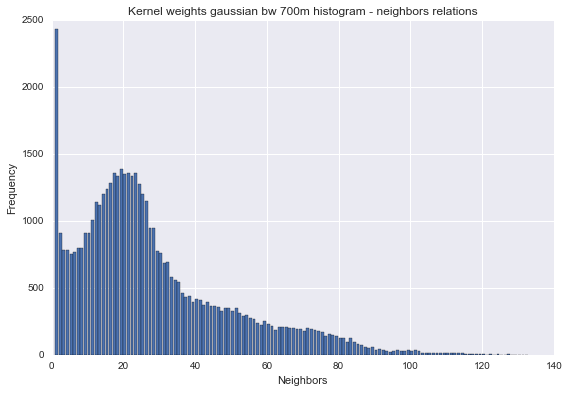

In [50]:
% matplotlib inline
sns.set(context="notebook")
plt.figure(facecolor="white", figsize=(9, 6), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Kernel weights gaussian bw 700m histogram - neighbors relations')
plt.bar(*zip(*weight_dist.histogram))

In [51]:
# Call main function to compute Moran and P-values ethnic groups for 700m
var_ethnics = list(cor_mat_prop)
matrices_ethnic_dist = calc_moran_matrix(var_ethnics, weight_dist, f1)

In [52]:
dfmoran_ethnic_dist = pd.DataFrame(matrices_ethnic_dist[0], columns=var_ethnics, index=var_ethnics)
dfmoran_ethnic_dist

,W.British,W.Irish,W.Gypsy,W.Other,MX.Wbc,MX.Wba,MX.Was,MX.other,As.Indian,As.Pakist,As.Bangl,As.Chin,As.other,B.African,B.Carib,B.other,Oth.Arab,Other.eth
W.British,0.911943,-0.319123,0.041315,-0.586581,-0.357425,-0.367838,-0.274356,-0.459438,-0.474350,-0.404861,-0.302484,-0.290658,-0.549457,-0.531643,-0.564134,-0.545539,-0.368304,-0.545848
W.Irish,-0.320015,0.498589,-0.048639,0.362157,0.167950,0.141971,0.215820,0.264371,0.085342,0.002815,0.008709,0.140904,0.162289,0.108557,0.194727,0.191624,0.211588,0.218284
W.Gypsy,0.040780,-0.049345,0.504399,-0.054550,-0.020825,-0.011554,-0.044028,-0.037365,-0.029868,-0.018532,-0.016508,-0.034191,-0.030107,0.002858,-0.018475,-0.016554,-0.027718,-0.030914
W.Other,-0.587221,0.362353,-0.054481,0.777978,0.195413,0.252771,0.311893,0.418879,0.077577,0.064324,0.106944,0.325452,0.251019,0.259501,0.286786,0.292626,0.382493,0.469680
MX.Wbc,-0.358686,0.167048,-0.021133,0.195717,0.426971,0.257140,0.100874,0.277558,0.008673,0.073724,0.055478,0.089149,0.121235,0.357526,0.469335,0.401200,0.065379,0.204894
MX.Wba,-0.368095,0.142099,-0.011447,0.252347,0.256940,0.307668,0.104185,0.259963,0.035569,0.055434,0.079252,0.134645,0.138245,0.368855,0.344535,0.339472,0.134061,0.235078
MX.Was,-0.276109,0.216512,-0.043649,0.313282,0.102415,0.105275,0.286928,0.208914,0.107878,0.044729,0.040211,0.158269,0.173007,0.065906,0.114706,0.113010,0.165792,0.198239
MX.other,-0.459397,0.263451,-0.037342,0.417955,0.277669,0.259965,0.206923,0.392189,0.069880,0.052944,0.087922,0.197005,0.195897,0.312880,0.374289,0.359531,0.209758,0.333349
As.Indian,-0.473887,0.085032,-0.030193,0.077598,0.008406,0.034980,0.107620,0.070366,0.809062,0.377552,0.078967,0.042034,0.501713,0.076781,0.104017,0.107175,0.137001,0.205356
As.Pakist,-0.405016,0.002088,-0.018604,0.065232,0.072274,0.055192,0.044367,0.052977,0.377414,0.757128,0.161118,-0.013277,0.305179,0.105936,0.149498,0.110200,0.072273,0.120689


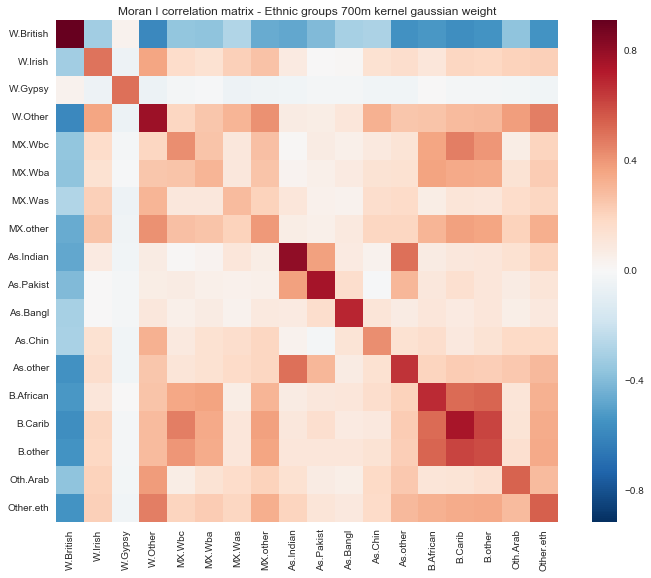

In [53]:
# Plot Heatmap based on dfmoran_ethnic_dist data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Ethnic groups 700m kernel gaussian weight')
sns.heatmap(dfmoran_ethnic_dist, square=True)

**Histogram showing the distribuition of neighbors in 2000m kernel weight**

In [54]:
# 2000m bandwdth with gaussian kernel function
weight_dist2k = pysal.Kernel(points, bandwidth=2000.0, function='gaussian')

<Container object of 671 artists>

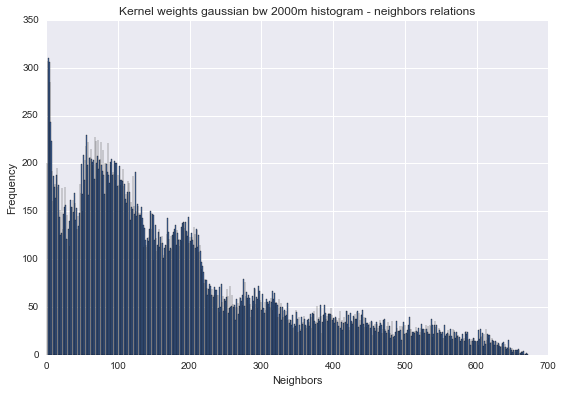

In [55]:
% matplotlib inline
sns.set(context="notebook")
plt.figure(facecolor="white", figsize=(9, 6), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Kernel weights gaussian bw 2000m histogram - neighbors relations')
plt.bar(*zip(*weight_dist2k.histogram))

In [57]:
# Call main function to compute Moran and P-values ethnic groups for 2000m
matrices_ethnic_dist2k = calc_moran_matrix(var_ethnics, weight_dist2k, f1)

In [58]:
dfmoran_ethnic_dist2k = pd.DataFrame(matrices_ethnic_dist2k[0], columns=var_ethnics, index=var_ethnics)
dfmoran_ethnic_dist2k

,W.British,W.Irish,W.Gypsy,W.Other,MX.Wbc,MX.Wba,MX.Was,MX.other,As.Indian,As.Pakist,As.Bangl,As.Chin,As.other,B.African,B.Carib,B.other,Oth.Arab,Other.eth
W.British,0.852229,-0.330974,0.046857,-0.564698,-0.338213,-0.345740,-0.271884,-0.440640,-0.438672,-0.358285,-0.280742,-0.268477,-0.500128,-0.489549,-0.529848,-0.510218,-0.346718,-0.518793
W.Irish,-0.333140,0.406605,-0.044742,0.362964,0.166006,0.145675,0.208035,0.259425,0.098694,0.018681,0.023887,0.149520,0.174593,0.126277,0.199046,0.200276,0.218212,0.232649
W.Gypsy,0.051774,-0.048084,0.128949,-0.054038,-0.025266,-0.018386,-0.041117,-0.039512,-0.026338,-0.018404,-0.015248,-0.033048,-0.032857,-0.006482,-0.024436,-0.022530,-0.029581,-0.030735
W.Other,-0.565571,0.362453,-0.049684,0.698873,0.199341,0.248924,0.295449,0.403456,0.079955,0.064542,0.124391,0.291277,0.244472,0.263391,0.295701,0.302568,0.378027,0.459752
MX.Wbc,-0.341612,0.164463,-0.023823,0.201263,0.338186,0.224419,0.107460,0.256110,0.031368,0.083664,0.063038,0.096840,0.118848,0.311626,0.418327,0.354640,0.063625,0.197813
MX.Wba,-0.346635,0.144339,-0.015853,0.248088,0.223193,0.233094,0.108606,0.240303,0.054105,0.060201,0.084496,0.130969,0.136793,0.314977,0.308984,0.300372,0.122431,0.224891
MX.Was,-0.274404,0.209210,-0.038547,0.296456,0.108726,0.110369,0.210499,0.200791,0.104923,0.044440,0.046689,0.141028,0.170617,0.083014,0.128634,0.127621,0.166167,0.200163
MX.other,-0.441703,0.259135,-0.036200,0.403138,0.255570,0.240503,0.199443,0.336419,0.077633,0.055643,0.096074,0.184864,0.187924,0.290212,0.353596,0.337643,0.202529,0.322882
As.Indian,-0.438673,0.099644,-0.024615,0.080439,0.031305,0.053745,0.104436,0.077609,0.686735,0.340649,0.076717,0.032222,0.460667,0.099695,0.116434,0.121873,0.137327,0.192792
As.Pakist,-0.359379,0.016579,-0.016904,0.067969,0.080088,0.059457,0.044358,0.055954,0.341295,0.597231,0.142540,-0.010075,0.267655,0.110228,0.144984,0.106196,0.065378,0.109243


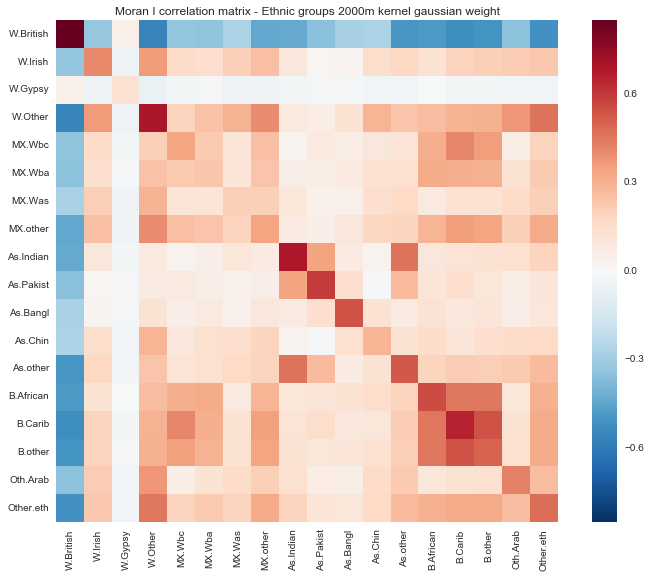

In [59]:
# Plot Heatmap based on dfmoran_ethnic_dist2k data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Ethnic groups 2000m kernel gaussian weight')
sns.heatmap(dfmoran_ethnic_dist2k, square=True)

## Qualification groups 

### Histograms

**Count in function of frequency sum**

In [60]:
# Build Census Qualification dataframe reading csv file
dataq = "~/Dropbox/Resolution - SP London/Data/Census/London/Census data for Segregation/"\
        "ks501ew_2011_oa_Qualifications/KS501EWDATA.csv"
dfcq = pd.read_csv(dataq)
dfcq.head()

,Geocode,All_categ,No_quals,Level_1,Level_2,_Apprent,Level_3,Level_4+,Other_qua,FTs_16-17,...,Level.2,.Apprent,Level.3,Level.4+,Other.qua,FTs.16-17,FTs.18+,FTs.18-74E,FTs.18-74U,FTs.18-74I
0,K04000001,45496780,10307327,6047384,6938433,1631777,5617802,12383477,2570580,1230368,...,15.250383,3.586577,12.347691,27.218359,5.650026,2.704297,5.461927,1.839225,0.483014,3.123190
1,E92000001,42989620,9656810,5714441,6544614,1532934,5309631,11769361,2461829,1163148,...,15.223707,3.565824,12.350961,27.377216,5.726566,2.705648,5.462242,1.842077,0.485043,3.118732
2,W92000004,2507160,650517,332943,393819,98843,308171,614116,108751,67220,...,15.707773,3.942429,12.291637,24.494488,4.337617,2.681121,5.456532,1.790313,0.448236,3.199636
3,E12000001,2134449,565208,291852,335926,101328,279693,473382,87060,54991,...,15.738301,4.747267,13.103757,22.178183,4.078804,2.576356,5.530936,1.765093,0.479890,3.268525
4,E12000002,5727629,1419620,777561,905338,225633,740829,1399038,259610,155844,...,15.806506,3.939379,12.934305,24.426128,4.532591,2.720916,5.430275,1.909551,0.511765,2.992984


In [61]:
# slice qualifications columns and sum each column
qualif = dfcq.loc[:,'No_quals':'FTs_18-74I']
qualif.sum()

No_quals      71500772
Level_1       41998745
Level_2       48175212
_Apprent      11323596
Level_3       39016443
Level_4+      86070223
Other_qua     17885309
FTs_16-17      8545356
FTs_18+       17258203
FTs_18-74E     5812630
FTs_18-74U     1527054
FTs_18-74I     9866437
dtype: int64

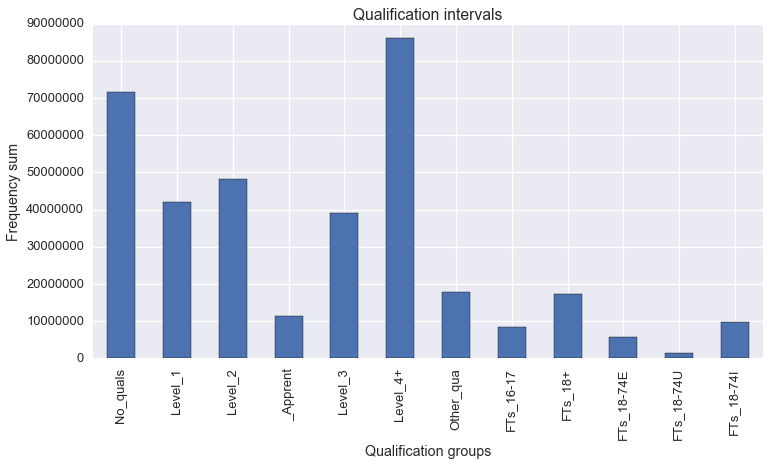

In [62]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 6), dpi=300)
plt.xlabel('Qualification groups')
plt.ylabel('Frequency sum')
plt.title('Qualification intervals')
plt.ticklabel_format(style='plain', axis='y')

qualif.sum().plot(kind='bar')

* Column "All_categ" removed from prot, total

### Pearson Correlation
This data frame selects columns data with percentage for qualification groups

In [63]:
# Slice data frame to get proportion data columns
quali_prop = dfcq.loc[:,'No.quals':'FTs.18-74I']
cor_quali_prop = quali_prop.corr()
cor_quali_prop

,No.quals,Level.1,Level.2,.Apprent,Level.3,Level.4+,Other.qua,FTs.16-17,FTs.18+,FTs.18-74E,FTs.18-74U,FTs.18-74I
No.quals,1.000000,0.368072,0.013388,0.111881,-0.372750,-0.799109,0.004163,0.023252,-0.216371,-0.232257,-0.076092,-0.209724
Level.1,0.368072,1.000000,0.468133,0.220845,-0.142664,-0.687612,-0.114188,0.226889,-0.286014,-0.236166,-0.140278,-0.295760
Level.2,0.013388,0.468133,1.000000,0.329572,0.014415,-0.399411,-0.356044,0.312414,-0.323565,-0.255317,-0.215461,-0.329546
.Apprent,0.111881,0.220845,0.329572,1.000000,-0.020037,-0.292839,-0.380039,-0.026352,-0.331247,-0.280369,-0.277947,-0.321206
Level.3,-0.372750,-0.142664,0.014415,-0.020037,1.000000,0.021294,-0.153192,-0.070705,0.693267,0.621128,0.492188,0.674745
Level.4+,-0.799109,-0.687612,-0.399411,-0.292839,0.021294,1.000000,-0.010232,-0.139873,0.092451,0.091671,-0.037611,0.103979
Other.qua,0.004163,-0.114188,-0.356044,-0.380039,-0.153192,-0.010232,1.000000,-0.029663,0.237089,0.226080,0.264273,0.209489
FTs.16-17,0.023252,0.226889,0.312414,-0.026352,-0.070705,-0.139873,-0.029663,1.000000,-0.078037,-0.076758,-0.035945,-0.076448
FTs.18+,-0.216371,-0.286014,-0.323565,-0.331247,0.693267,0.092451,0.237089,-0.078037,1.000000,0.862780,0.763583,0.976073
FTs.18-74E,-0.232257,-0.236166,-0.255317,-0.280369,0.621128,0.091671,0.226080,-0.076758,0.862780,1.000000,0.660677,0.746564


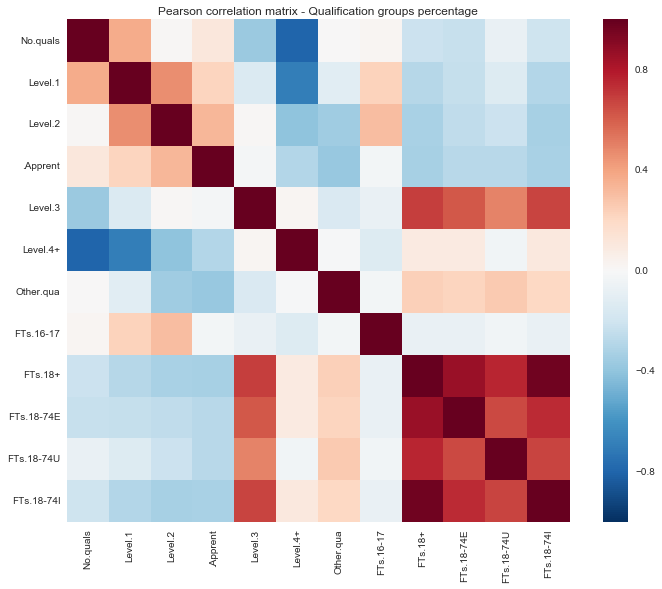

In [64]:
# Plot Heatmap based on cor_mat_prop data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f4, ax4 = plt.subplots(figsize=(12, 9))
plt.title('Pearson correlation matrix - Qualification groups percentage')
sns.heatmap(cor_quali_prop, square=True)

### Moran I Correlation

Based on percentage of groups

#### Based on Queen Contiguity Weight

Prepares data reading shape file for OA London and computes Contiguity Based Weights using Queen method

In [65]:
# Call main function to compute Moran and P-values for qualification groups
var_quali = list(cor_quali_prop)
matrices_quali = calc_moran_matrix(var_quali, weight_cont, f1)

DataFrame with pairwise results

In [66]:
dfmoran_quali = pd.DataFrame(matrices_quali[0], columns=var_quali, index=var_quali)
dfmoran_quali

,No.quals,Level.1,Level.2,.Apprent,Level.3,Level.4+,Other.qua,FTs.16-17,FTs.18+,FTs.18-74E,FTs.18-74U,FTs.18-74I
No.quals,0.211366,-0.045284,-0.119925,-0.163664,-0.153707,0.103977,0.059110,0.160981,-0.041650,0.314924,0.245781,0.194166
Level.1,-0.051352,0.514653,0.422906,0.246971,0.216737,-0.050697,-0.541397,0.010470,0.127558,-0.056074,-0.011170,0.043496
Level.2,-0.129520,0.424593,0.632709,0.530853,0.434864,0.099063,-0.637002,-0.197261,0.181791,-0.218378,-0.122566,-0.076979
.Apprent,-0.172494,0.248698,0.529343,0.606736,0.489524,0.171861,-0.487083,-0.380744,0.199125,-0.325321,-0.226296,-0.186094
Level.3,-0.160417,0.212840,0.427526,0.486481,0.570648,0.142486,-0.391514,-0.405912,0.109863,-0.327030,-0.249223,-0.230707
Level.4+,0.121587,-0.049524,0.102669,0.176453,0.146194,0.342274,-0.103292,-0.172900,0.017601,0.121744,0.114705,0.041915
Other.qua,0.064230,-0.543991,-0.637926,-0.488058,-0.398669,-0.099983,0.740369,0.046833,-0.199338,0.095705,0.008500,-0.030786
FTs.16-17,0.163632,0.016194,-0.189300,-0.378126,-0.403933,-0.171710,0.039451,0.709071,-0.044552,0.379164,0.353269,0.335593
FTs.18+,-0.044738,0.132138,0.181924,0.195861,0.106643,0.014764,-0.201305,-0.040761,0.185977,-0.068163,-0.032497,-0.002223
FTs.18-74E,0.343845,-0.052984,-0.209290,-0.319037,-0.322016,0.126928,0.088254,0.375556,-0.069297,0.571093,0.483243,0.398190


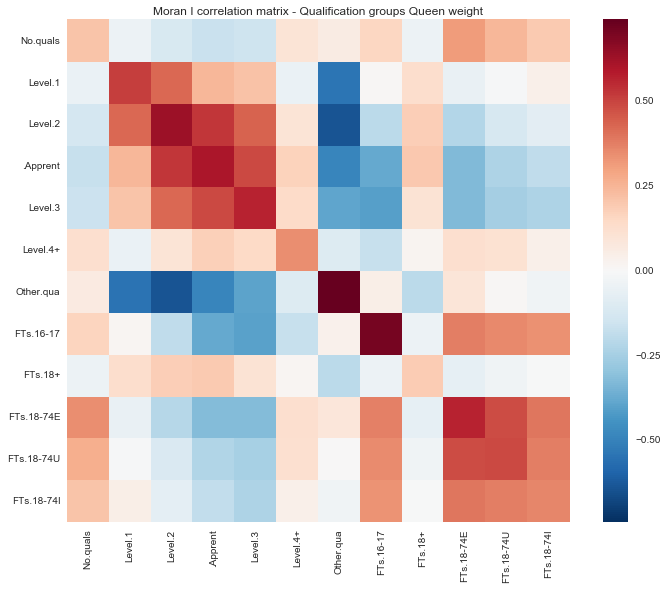

In [67]:
# Plot Heatmap based on dfmoran_quali data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f5, ax5 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Qualification groups Queen weight')
sns.heatmap(dfmoran_quali, square=True)

P-values obtained from previous map

In [68]:
dfpvalue_quali = pd.DataFrame(matrices_quali[1], columns=var_quali, index=var_quali)
dfpvalue_quali

,No.quals,Level.1,Level.2,.Apprent,Level.3,Level.4+,Other.qua,FTs.16-17,FTs.18+,FTs.18-74E,FTs.18-74U,FTs.18-74I
No.quals,0.000000e+00,1.873862e-81,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.872406e-72,0.000000e+00,0.000000e+00,0.000000e+00
Level.1,7.893393e-47,0.000000e+00,0.000000e+00,0.0,0.0,4.692102e-45,0.000000e+00,1.614502e-03,0.000000e+00,5.550173e-58,1.069579e-03,0.000000e+00
Level.2,1.248901e-238,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.220640e-197,3.940147e-79
.Apprent,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Level.3,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Level.4+,0.000000e+00,4.133342e-58,0.000000e+00,0.0,0.0,0.000000e+00,9.918030e-237,0.000000e+00,3.330899e-09,0.000000e+00,0.000000e+00,0.000000e+00
Other.qua,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,8.733326e-126,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.672190e-02,1.432509e-13
FTs.16-17,0.000000e+00,5.934368e-05,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.219057e-25,0.000000e+00,0.000000e+00,0.000000e+00
FTs.18+,2.117757e-63,0.000000e+00,0.000000e+00,0.0,0.0,1.298734e-08,0.000000e+00,7.868224e-50,0.000000e+00,1.517780e-141,8.786151e-35,2.033235e-01
FTs.18-74E,0.000000e+00,7.271147e-49,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.164747e-80,0.000000e+00,0.000000e+00,0.000000e+00


#### Based on Kernel Weight

Weight computed using a 700m Kernel function with a gaussian form

In [69]:
# Call main function to compute Moran and P-values qualification groups
matrices_quali_dist = calc_moran_matrix(var_quali, weight_dist, f1)

In [70]:
dfmoran_quali_dist = pd.DataFrame(matrices_quali_dist[0], columns=var_quali, index=var_quali)
dfmoran_quali_dist

,No.quals,Level.1,Level.2,.Apprent,Level.3,Level.4+,Other.qua,FTs.16-17,FTs.18+,FTs.18-74E,FTs.18-74U,FTs.18-74I
No.quals,0.397812,-0.052298,-0.127405,-0.163406,-0.159407,0.122293,0.061777,0.161605,-0.029220,0.339535,0.249379,0.228144
Level.1,-0.050226,0.502303,0.387638,0.216887,0.212792,-0.062124,-0.506783,-0.001430,0.099832,-0.059381,-0.017945,0.030810
Level.2,-0.125230,0.390815,0.647976,0.514103,0.428463,0.098171,-0.612570,-0.206492,0.169337,-0.216282,-0.123757,-0.086077
.Apprent,-0.161673,0.219209,0.515725,0.640689,0.478472,0.173282,-0.472567,-0.384154,0.215851,-0.313413,-0.220558,-0.187677
Level.3,-0.158387,0.216958,0.431625,0.479476,0.625200,0.139365,-0.399736,-0.402928,0.095979,-0.321475,-0.244410,-0.227200
Level.4+,0.117910,-0.061520,0.098974,0.172636,0.139505,0.368189,-0.097680,-0.177818,0.017333,0.108804,0.105485,0.039542
Other.qua,0.060195,-0.508428,-0.610914,-0.470414,-0.395793,-0.097007,0.698970,0.062166,-0.183366,0.101543,0.019547,-0.013937
FTs.16-17,0.161758,-0.003751,-0.208976,-0.384691,-0.403259,-0.178542,0.064768,0.698403,-0.038310,0.360815,0.331477,0.317230
FTs.18+,-0.027865,0.097485,0.166758,0.214757,0.094632,0.017586,-0.180403,-0.039220,0.355835,-0.049013,-0.029500,-0.008254
FTs.18-74E,0.334465,-0.061468,-0.218440,-0.313976,-0.321949,0.109012,0.103825,0.360370,-0.048999,0.542749,0.460417,0.382528


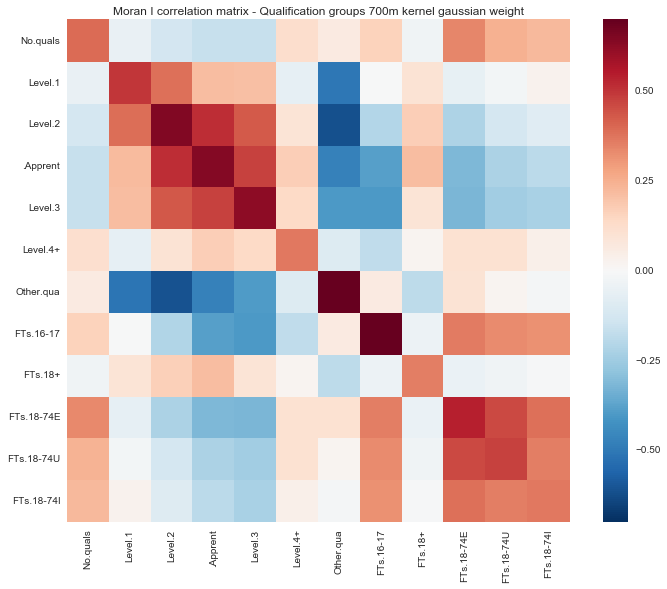

In [71]:
# Plot Heatmap based on dfmoran data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Qualification groups 700m kernel gaussian weight')
sns.heatmap(dfmoran_quali_dist, square=True)

In [72]:
# Call main function to compute Moran and P-values qualification groups
matrices_quali_dist2k = calc_moran_matrix(var_quali, weight_dist2k, f1)

In [73]:
dfmoran_quali_dist2k = pd.DataFrame(matrices_quali_dist2k[0], columns=var_quali, index=var_quali)
dfmoran_quali_dist2k

,No.quals,Level.1,Level.2,.Apprent,Level.3,Level.4+,Other.qua,FTs.16-17,FTs.18+,FTs.18-74E,FTs.18-74U,FTs.18-74I
No.quals,0.128150,-0.034224,-0.112108,-0.152594,-0.140249,0.031116,0.068517,0.141556,-0.033172,0.213824,0.171847,0.136934
Level.1,-0.034359,0.322674,0.316225,0.213533,0.181951,-0.012157,-0.373054,-0.027784,0.084015,-0.052028,-0.016163,0.021040
Level.2,-0.112348,0.319345,0.531159,0.468891,0.397439,0.097588,-0.510853,-0.216546,0.135138,-0.210841,-0.126048,-0.094465
.Apprent,-0.153634,0.215505,0.470534,0.552774,0.455869,0.153630,-0.426391,-0.371024,0.154037,-0.306694,-0.216627,-0.187524
Level.3,-0.140296,0.186720,0.402319,0.458121,0.512899,0.142572,-0.359495,-0.381905,0.092411,-0.297169,-0.226276,-0.209690
Level.4+,0.029692,-0.011624,0.099630,0.154361,0.141774,0.212034,-0.087701,-0.170162,0.014081,0.015281,0.028163,-0.018329
Other.qua,0.069045,-0.374342,-0.508850,-0.424430,-0.353831,-0.086067,0.550694,0.101916,-0.144958,0.123920,0.046752,0.017032
FTs.16-17,0.142529,-0.031074,-0.222009,-0.373226,-0.382905,-0.171919,0.106896,0.602919,-0.032539,0.325055,0.291297,0.282925
FTs.18+,-0.034195,0.081056,0.132893,0.154109,0.091137,0.014885,-0.142187,-0.033532,0.145244,-0.058624,-0.027586,-0.010425
FTs.18-74E,0.211771,-0.054025,-0.212411,-0.305228,-0.296675,0.015038,0.125499,0.324143,-0.057029,0.402619,0.345821,0.287791


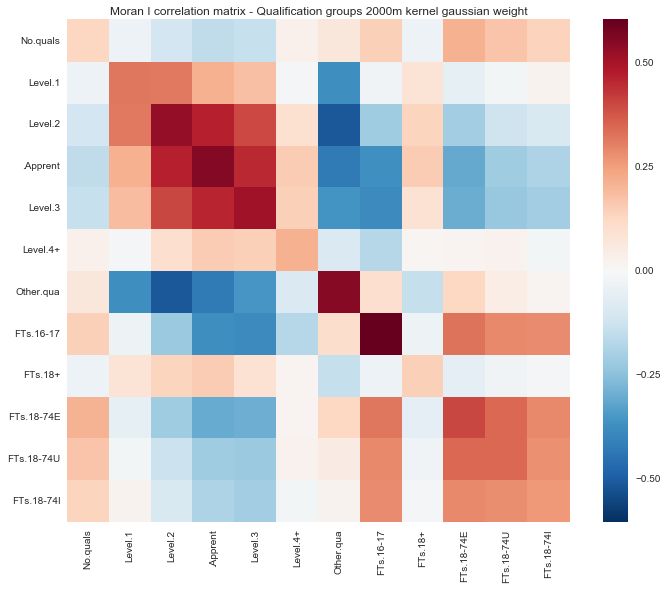

In [74]:
# Plot Heatmap based on  data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Qualification groups 2000m kernel gaussian weight')
sns.heatmap(dfmoran_quali_dist2k, square=True)

## Ocupation groups

### Histograms  (QS607EW - old table)

**Count in function of frequency sum (QS607EW - old table)**

In [77]:
# Build Census Ocupation dataframe reading csv file
datao = "~/Dropbox/Resolution - SP London/Data/Census/London/old/qs607ew_2011_oa/"\
        "RES Met London data/RES Met London QS607EW_oa_occupation_1.csv"
dfco = pd.read_csv(datao)
dfco.head()

,code,label,name,QS607EW0001,QS607EW0002,QS607EW0003,QS607EW0004,QS607EW0005,QS607EW0006,QS607EW0007,...,QS607EW0046,QS607EW0047,QS607EW0048,QS607EW0049,QS607EW0050,QS607EW0051,QS607EW0052,QS607EW0053,QS607EW0054,QS607EW0055
0,E00000095,E09000002E02000010E01000015E00000095,NaN,330,12,4,0,4,8,7,...,5,16,22,1,24,17,7,29,29,0
1,E00000096,E09000002E02000014E01000013E00000096,NaN,202,10,1,0,1,9,5,...,4,12,11,0,22,18,4,14,14,0
2,E00000097,E09000002E02000014E01000013E00000097,NaN,225,7,0,0,0,7,3,...,2,9,16,0,14,11,3,15,15,0
3,E00000098,E09000002E02000014E01000014E00000098,NaN,207,12,1,0,1,11,7,...,1,11,16,0,21,16,5,11,11,0
4,E00000001,E09000001E02000001E01000001E00000001,NaN,148,65,8,0,8,57,31,...,0,1,1,0,2,1,1,7,7,0


In [78]:
# slice ocupations columns and sum each column
ocupation = dfco.loc[:,'QS607EW0002':'QS607EW0055']
ocupation.sum()

QS607EW0002    1540303
QS607EW0003     324923
QS607EW0004       4106
QS607EW0005     320817
QS607EW0006    1215380
QS607EW0007     597835
QS607EW0008     427500
QS607EW0009     152297
QS607EW0010      37748
QS607EW0011    2764281
QS607EW0012    1789294
QS607EW0013    1277322
QS607EW0014     220604
QS607EW0015     244456
QS607EW0016      46912
QS607EW0017     666079
QS607EW0018     308908
QS607EW0019    1535059
QS607EW0020     975188
QS607EW0021     402166
QS607EW0022     106505
QS607EW0023      51200
QS607EW0024    1170167
QS607EW0025     267515
QS607EW0026     261885
QS607EW0027       5630
QS607EW0028     902652
QS607EW0029     887394
QS607EW0030      15258
QS607EW0031     664214
QS607EW0032     388435
QS607EW0033     275779
QS607EW0034     245578
QS607EW0035      30201
QS607EW0036    1327376
QS607EW0037     441540
QS607EW0038     524387
QS607EW0039      61519
QS607EW0040     103546
QS607EW0041       8521
QS607EW0042     146307
QS607EW0043      41556
QS607EW0044     940769
QS607EW0045

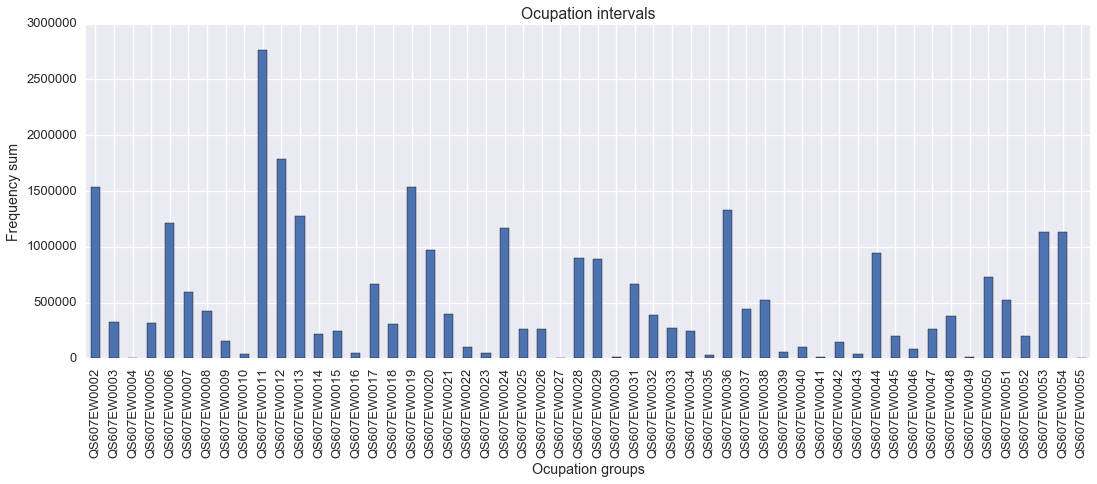

In [79]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(18, 6), dpi=300)
plt.xlabel('Ocupation groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals')
plt.ticklabel_format(style='plain', axis='y')

ocupation.sum().plot(kind='bar')

#### Ocupation groups code descriptions

<prep>
````
QS607EW0001	All categories: NS-SeC
QS607EW0002	1. Higher managerial, administrative and professional occupations
QS607EW0003	1.1 Large employers and higher managerial and administrative occupations
QS607EW0004	L1 Employers in large establishments
QS607EW0005	L2 Higher managerial and administrative occupations
QS607EW0006	1.2 Higher professional occupations
QS607EW0007	L3.1 Traditional employees
QS607EW0008	L3.2 New employees
QS607EW0009	L3.3 Traditional self-employed
QS607EW0010	L3.4 New self-employed
QS607EW0011	2. Lower managerial, administrative and professional occupations
QS607EW0012	L4 Lower professional and higher technical occupations
QS607EW0013	L4.1 Traditional employees
QS607EW0014	L4.2 New employees
QS607EW0015	L4.3 Traditional self-employed
QS607EW0016	L4.4 New self-employed
QS607EW0017	L5 Lower managerial and administrative occupations
QS607EW0018	L6 Higher supervisory occupations
QS607EW0019	3. Intermediate occupations
QS607EW0020	L7.1 Intermediate clerical and administrative occupations
QS607EW0021	L7.2 Intermediate sales and service occupations
QS607EW0022	L7.3 Intermediate technical and auxiliary occupations
QS607EW0023	L7.4 Intermediate engineering occupations
QS607EW0024	4. Small employers and own account workers
QS607EW0025	L8 Employers in small establishments
QS607EW0026	L8.1 Employers in small establishments in industry, commerce, services etc.
QS607EW0027	L8.2 Employers in small establishments in agriculture
QS607EW0028	L9 Own account workers
QS607EW0029	L9.1 Own account workers (non-professional)
QS607EW0030	L9.2 Own account workers (agriculture)
QS607EW0031	5. Lower supervisory and technical occupations
QS607EW0032	L10 Lower supervisory occupations
QS607EW0033	L11 Lower technical occupations
QS607EW0034	L11.1 Lower technical craft occupations
QS607EW0035	L11.2 Lower technical process operative occupations
QS607EW0036	6. Semi-routine occupations
QS607EW0037	L12.1 Semi-routine sales occupations
QS607EW0038	L12.2 Semi-routine service occupations
QS607EW0039	L12.3 Semi-routine technical occupations
QS607EW0040	L12.4 Semi-routine operative occupations
QS607EW0041	L12.5 Semi-routine agricultural occupations
QS607EW0042	L12.6 Semi-routine clerical occupations
QS607EW0043	L12.7 Semi-routine childcare occupations
QS607EW0044	7. Routine occupations
QS607EW0045	L13.1 Routine sales and service occupations
QS607EW0046	L13.2 Routine production occupations
QS607EW0047	L13.3 Routine technical occupations
QS607EW0048	L13.4 Routine operative occupations
QS607EW0049	L13.5 Routine agricultural occupations
QS607EW0050	8. Never worked and long-term unemployed
QS607EW0051	L14.1 Never worked
QS607EW0052	L14.2 Long-term unemployed
QS607EW0053	Not classified
QS607EW0054	L15 Full-time students
QS607EW0055	L17 Not classifiable for other reasons
````
<prep>

* Column removed, totals
* Higher level shows the sum of sub levels? Validating with group 7 the total equals sub levels

### Ocupation groups higher levels in function of frequency sum

In [80]:
# slice ocupations columns and sum each column
higher = dfco[['QS607EW0002',
               'QS607EW0011', 
               'QS607EW0019', 
               'QS607EW0024', 
               'QS607EW0031',
               'QS607EW0036', 
               'QS607EW0044', 
               'QS607EW0050']]
higher.sum()

QS607EW0002    1540303
QS607EW0011    2764281
QS607EW0019    1535059
QS607EW0024    1170167
QS607EW0031     664214
QS607EW0036    1327376
QS607EW0044     940769
QS607EW0050     727015
dtype: int64

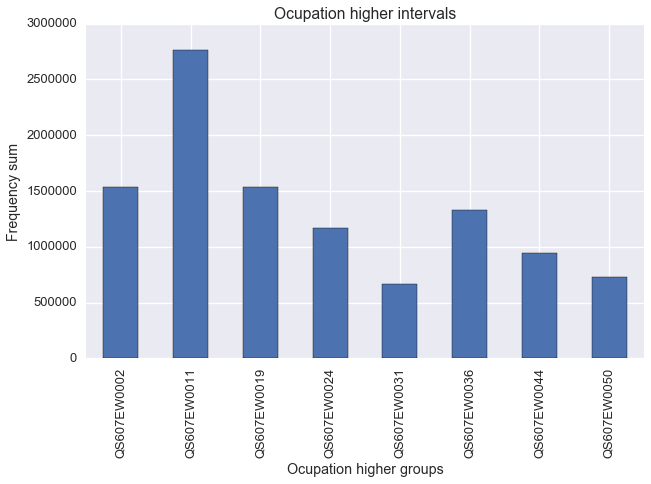

In [81]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Ocupation higher groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation higher intervals')
plt.ticklabel_format(style='plain', axis='y')

higher.sum().plot(kind='bar')

### Pearson Correlation (QS606EW)

This data frame selects columns data with percentage for ocupation groups

In [82]:
# Build Census ocupation dataframe reading csv file
dataoccup = "~/Dropbox/Resolution - SP London/Data/Census/London/Census data for Segregation/" \
            "qs606ew_2011_occupation/qs606ew_oa_occupation_minor.csv"
dfoccup = pd.read_csv(dataoccup)
dfoccup.head()

,Geocode,x,y,S606EW0001,Managers,S606EW0003,S606EW0004,S606EW0005,S606EW0006,S606EW0007,...,S606EW0116,S606EW0117,S606EW0118,S606EW0119,S606EW0120,S606EW0121,S606EW0122,S606EW0123,S606EW0124,S606EW0125
0,E00000095,549358,184838,218,15,12,0,0,3,2,...,0,3,3,30,3,11,2,0,3,11
1,E00000096,548893,184784,115,7,3,0,0,0,0,...,0,0,1,20,2,5,5,0,5,3
2,E00000097,548740,184793,138,6,5,0,1,1,0,...,0,1,0,19,4,5,5,0,2,3
3,E00000098,548200,184658,128,8,7,0,1,2,2,...,0,1,2,11,1,7,1,1,1,0
4,E00000001,532257,181866,102,18,13,3,0,8,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Slice data frame to get proportion data columns
occup_prop = dfoccup.loc[:,'Managers':'S606EW0125'] 
cor_occup_prop = occup_prop.corr()
cor_occup_prop.head()

,Managers,S606EW0003,S606EW0004,S606EW0005,S606EW0006,S606EW0007,S606EW0008,S606EW0009,S606EW0010,S606EW0011,...,S606EW0116,S606EW0117,S606EW0118,S606EW0119,S606EW0120,S606EW0121,S606EW0122,S606EW0123,S606EW0124,S606EW0125
Managers,1.000000,0.952843,0.514982,0.522413,0.772745,0.518547,0.172233,0.341881,0.183304,0.420265,...,0.082271,-0.141364,-0.161173,-0.320810,-0.166177,-0.292735,-0.245297,-0.137706,-0.227219,-0.115543
S606EW0003,0.952843,1.000000,0.510442,0.526658,0.775574,0.543690,0.192378,0.431467,0.182987,0.420394,...,0.053896,-0.144633,-0.160259,-0.335156,-0.163557,-0.304181,-0.247223,-0.128542,-0.213341,-0.148927
S606EW0004,0.514982,0.510442,1.000000,0.154121,0.490156,0.415060,-0.039073,0.004651,0.025633,0.080921,...,0.016541,-0.135318,-0.136759,-0.262155,-0.175634,-0.204873,-0.194522,-0.132156,-0.193757,-0.106480
S606EW0005,0.522413,0.526658,0.154121,1.000000,0.302285,0.150807,0.162197,0.008589,0.081228,0.234470,...,0.141239,-0.033215,-0.069034,-0.218193,-0.061150,-0.206958,-0.169928,-0.036963,-0.087627,-0.141436
S606EW0006,0.772745,0.775574,0.490156,0.302285,1.000000,0.472136,0.016955,0.010829,0.098288,0.179555,...,0.011001,-0.194834,-0.214747,-0.391935,-0.223025,-0.337352,-0.285569,-0.180025,-0.289044,-0.151870


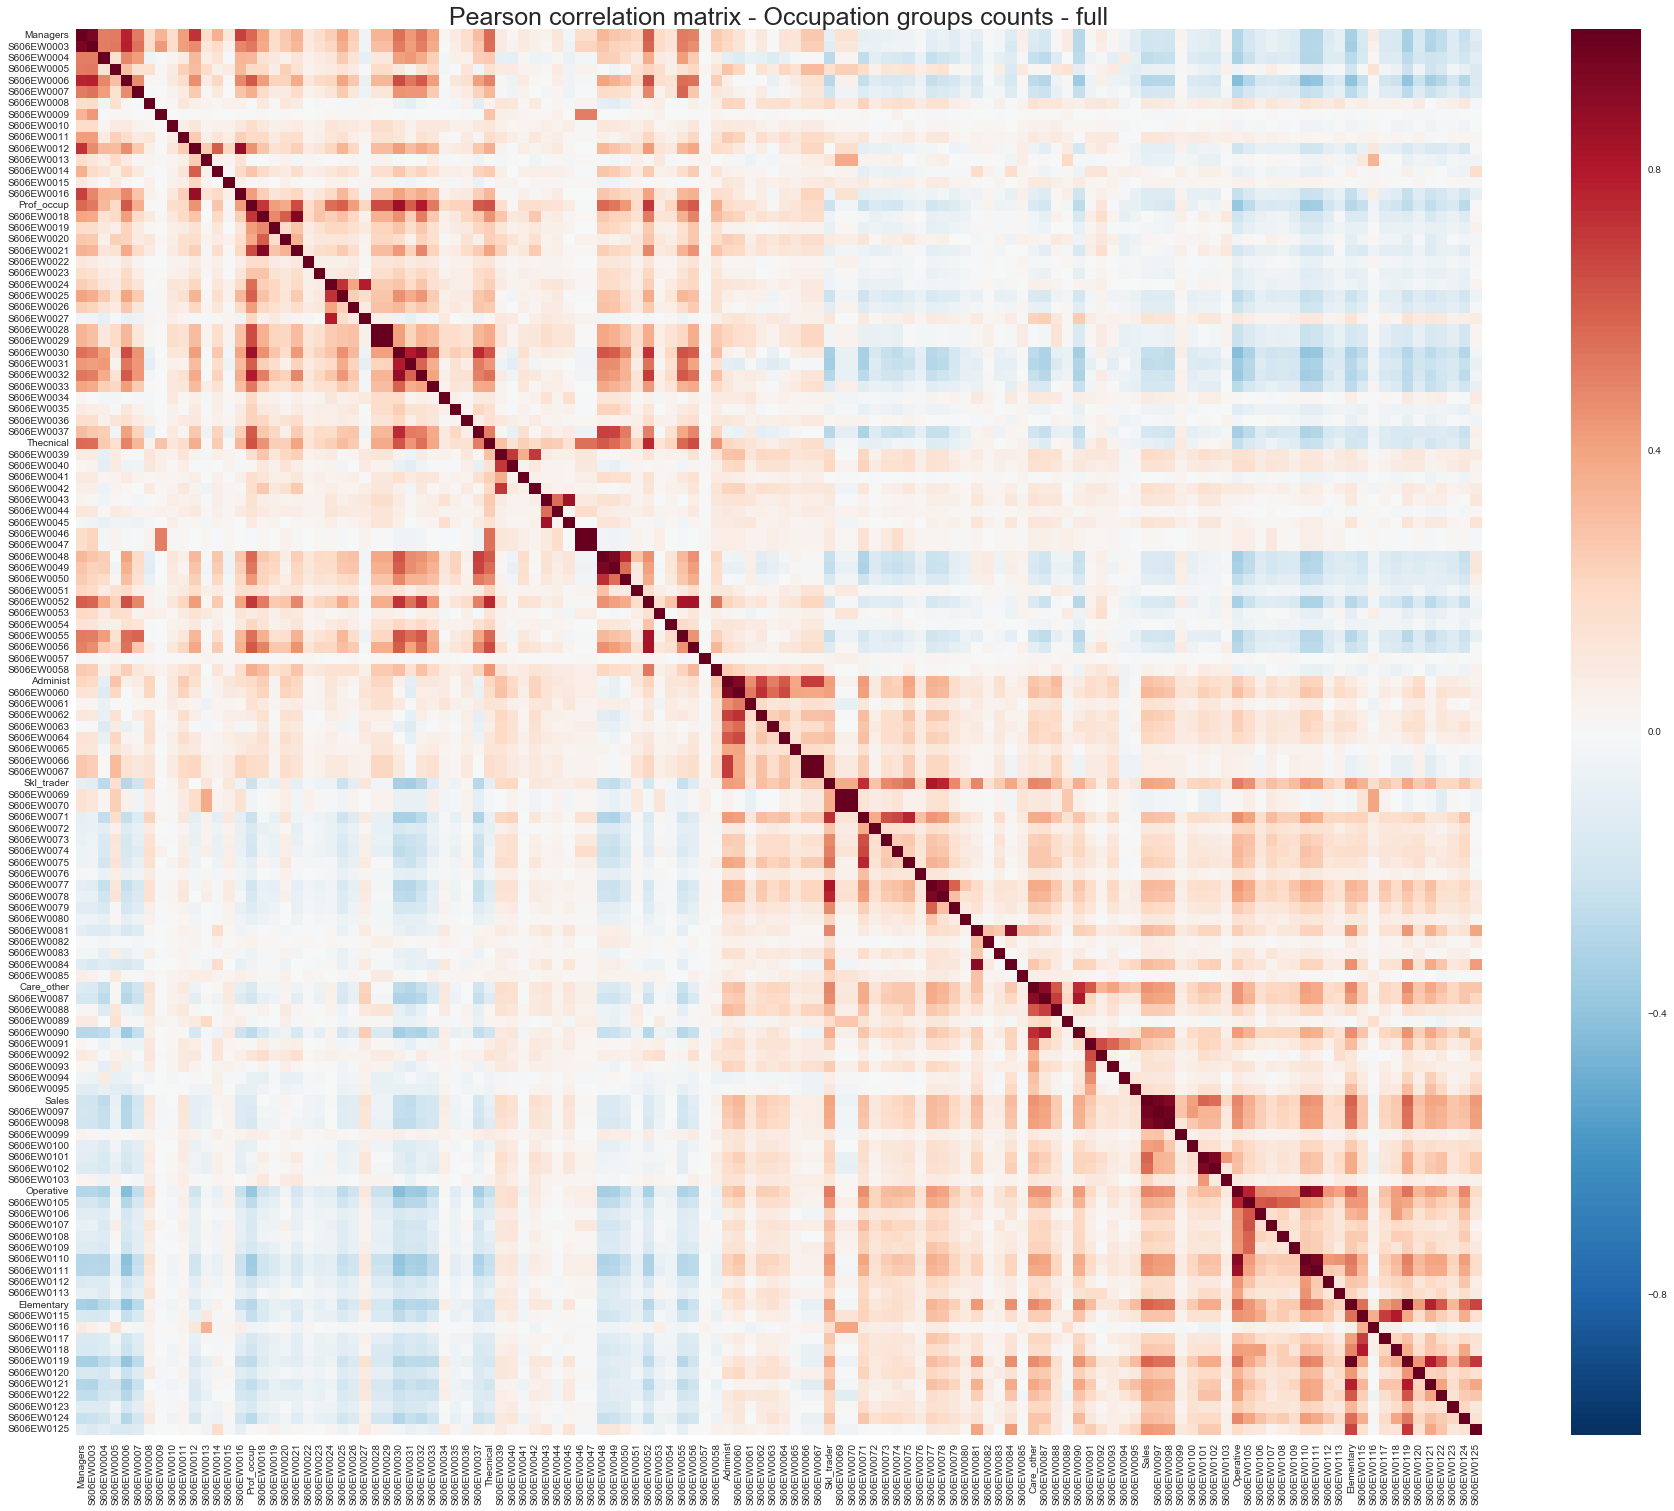

In [84]:
# Plot Heatmap based on cor_ocup_prop data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
f4, ax4 = plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups counts - full', fontsize=25)
sns.heatmap(cor_occup_prop, square=True)
f4.tight_layout()
plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_full.png")

### Moran I Correlation (QS606EW)

#### Based on Queen Contiguity Weight

Prepares data reading shape file for OA London and computes Contiguity Based Weights using Queen method

In [85]:
shp_path3 = "/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "London/OA Boundary/resolution_oa_2011_qs606ew.shp"
weight_cont_occup = pysal.queen_from_shapefile(shp_path3)

Island id:  [34622]


**Histogram showing the distribuition of neighbors in queen weight**

<Container object of 29 artists>

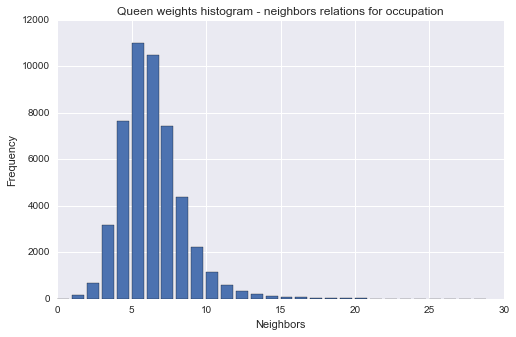

In [86]:
% matplotlib inline
sns.set(context="notebook")
plt.figure(facecolor="white", figsize=(8, 5), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Queen weights histogram - neighbors relations for occupation')
plt.bar(*zip(*weight_cont_occup.histogram))

**Compute Bivariate Moran for all elements of occupation groups**

Variables are compared pairwised resulting on a matrix
999 random permutations are used for calculation of pseudo p_values

In [ ]:
# Call main function to compute Moran and P-values ethnic groups
    
f2 = pysal.open("/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
               "London/OA Boundary/resolution_oa_2011_qs606ew_cent.dbf")

var_occup = list(cor_occup_prop)
matrices_occup = calc_moran_matrix(var_occup, weight_cont_occup, f2)

DataFrame with pairwise results

In [87]:
dfmoran_occup = pd.DataFrame(matrices_occup[0], columns=var_occup, index=var_occup)
dfmoran_occup.head()

,Managers,S606EW0003,S606EW0004,S606EW0005,S606EW0006,S606EW0007,S606EW0008,S606EW0009,S606EW0010,S606EW0011,...,S606EW0116,S606EW0117,S606EW0118,S606EW0119,S606EW0120,S606EW0121,S606EW0122,S606EW0123,S606EW0124,S606EW0125
Managers,0.431649,0.411330,0.322780,0.229760,0.430536,0.276637,0.019454,0.033920,0.038128,0.120591,...,0.065303,-0.139026,-0.159860,-0.323716,-0.173614,-0.264572,-0.245736,-0.132579,-0.219084,-0.152823
S606EW0003,0.413559,0.405955,0.313733,0.225110,0.420157,0.286033,0.027678,0.040307,0.031094,0.107621,...,0.051563,-0.137907,-0.154802,-0.324129,-0.165365,-0.268786,-0.241592,-0.122141,-0.202928,-0.167085
S606EW0004,0.314099,0.304166,0.409724,0.069921,0.354204,0.304488,-0.057570,0.004939,-0.003590,0.019617,...,0.008917,-0.124489,-0.128190,-0.230737,-0.160527,-0.175110,-0.172514,-0.117623,-0.175901,-0.092325
S606EW0005,0.235593,0.228071,0.079998,0.316018,0.162400,0.062848,0.105987,0.012917,0.030461,0.121228,...,0.140556,-0.039060,-0.064502,-0.217288,-0.065600,-0.188849,-0.172385,-0.036365,-0.075977,-0.160691
S606EW0006,0.430848,0.418685,0.362695,0.157685,0.513247,0.313447,-0.030016,0.010801,0.038629,0.067171,...,0.010521,-0.180979,-0.202458,-0.355021,-0.208785,-0.287405,-0.262596,-0.166325,-0.264683,-0.148032


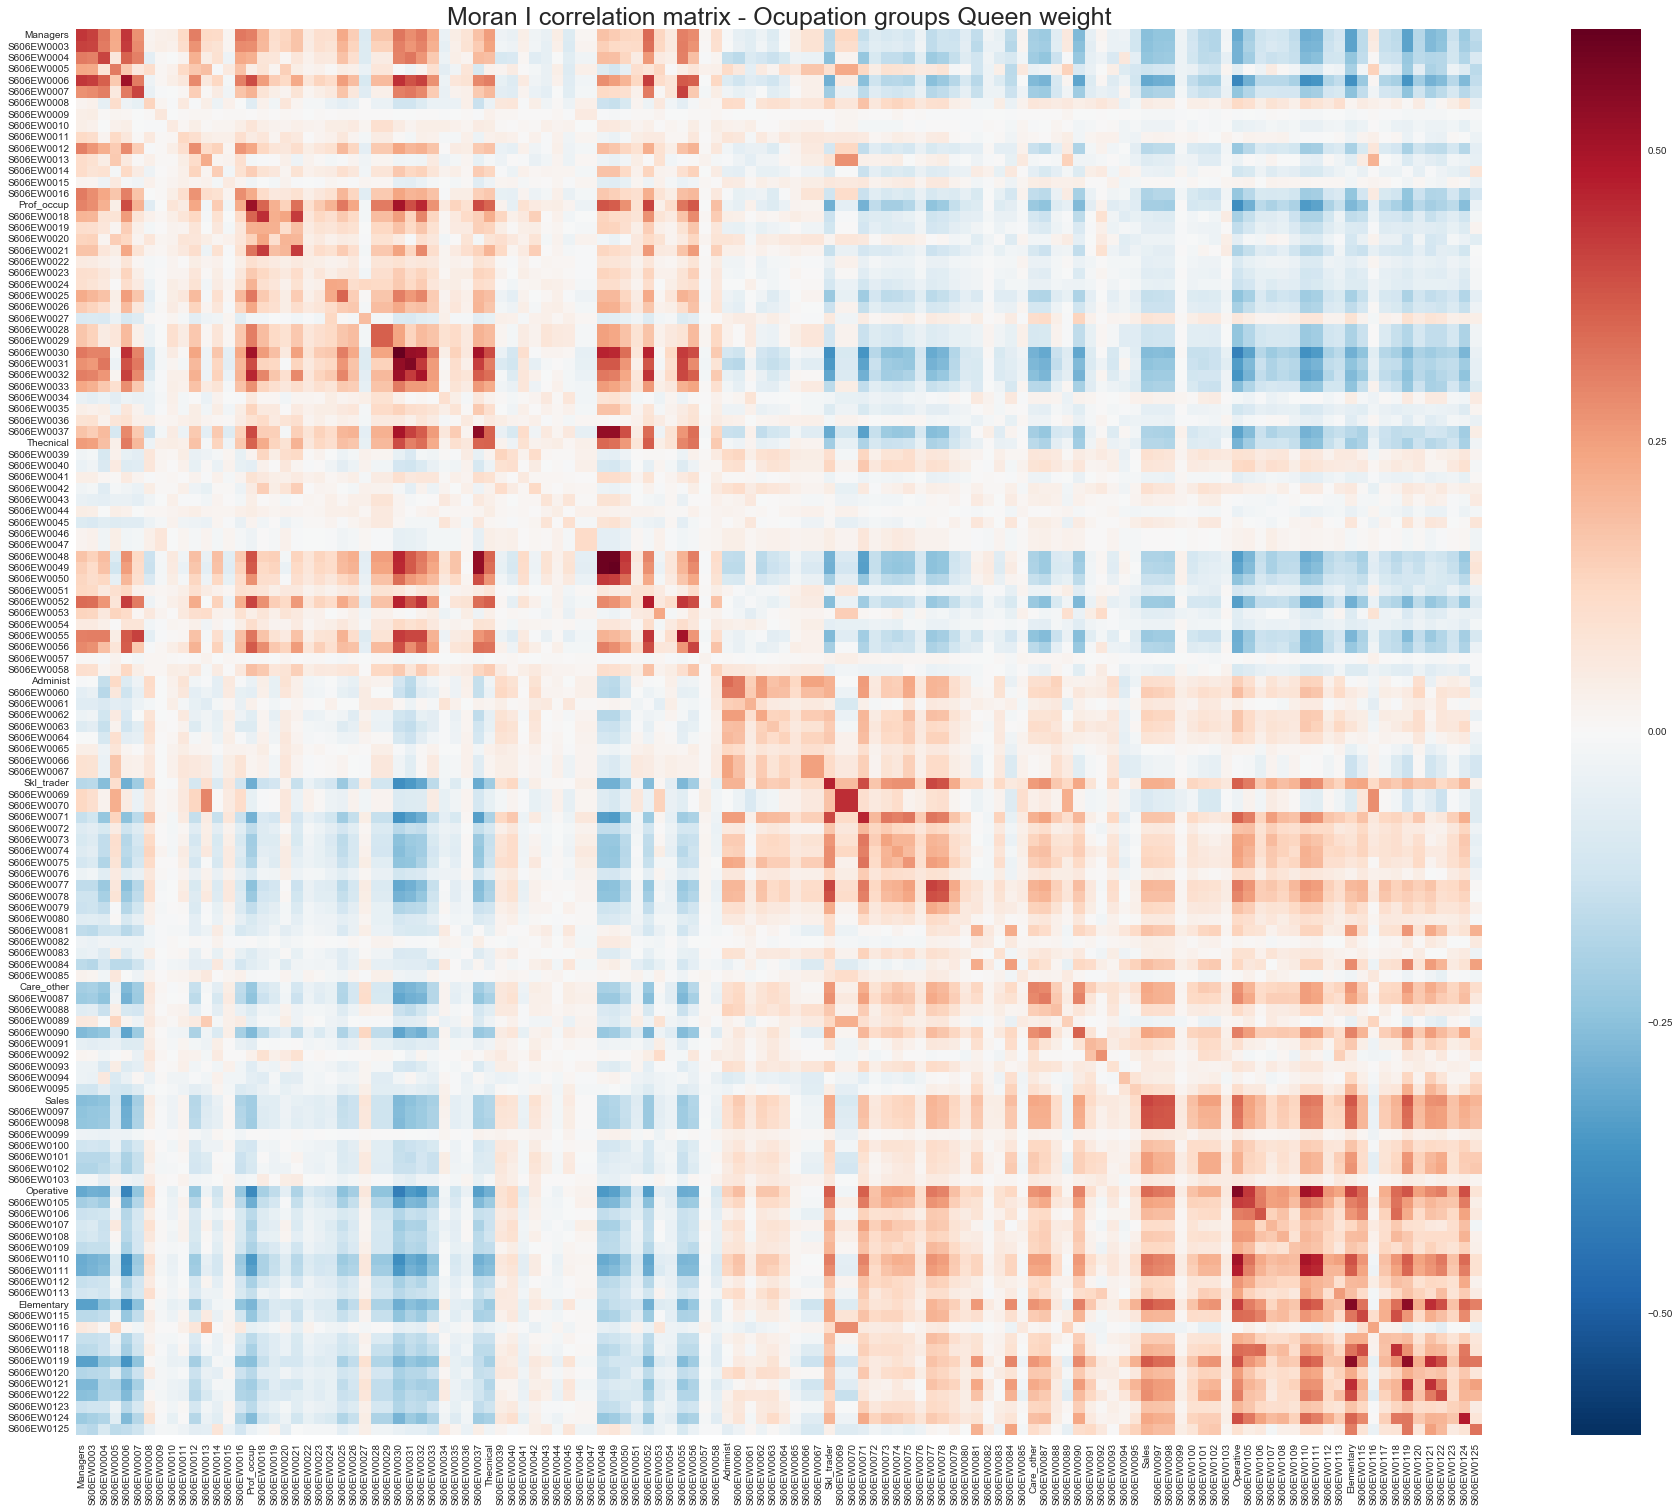

In [20]:
# Plot Heatmap based on dfmoran_occup data frame - Proportions 
% matplotlib inline
sns.set(context="notebook")
f5, ax5 = plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Moran I correlation matrix - Ocupation groups Queen weight', fontsize=25)
sns.heatmap(dfmoran_occup, square=True)
f5.tight_layout()
plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_moran_full.png")

#### Based on Kernel Weight

Weight computed using a Kernel function with a gaussian form